## Time Series Analysis


In [12]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

pl.style.use('ggplot')

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [13]:
subway = np.load('MTA_Fare.npy')
print subway.shape

#Replacing all -1 with NANs for ease of understanding
subway = subway.astype(float)
subway[subway == -1] = np.nan

(600, 23, 194)


In [14]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

# Task 1

Rows : Subway station <br>
Columns : variables (swipe type) <br>
Height : Time

In [15]:
subway[0,0,0]

56961.0

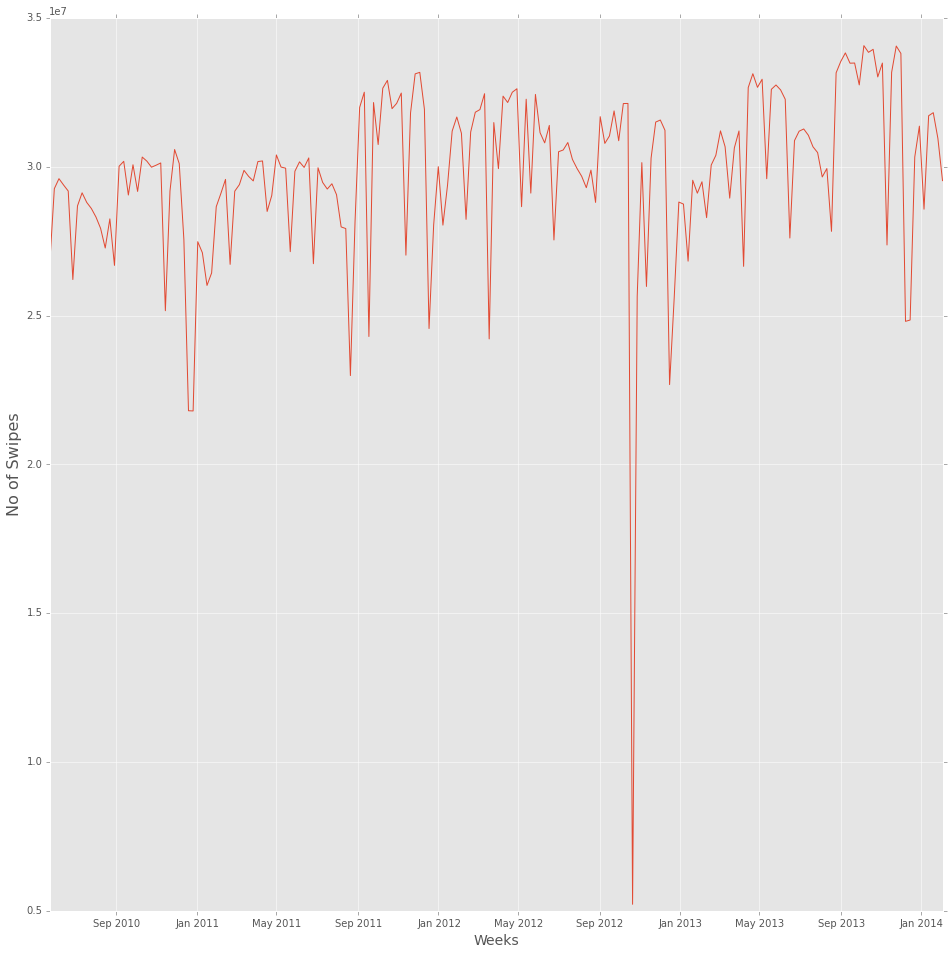

In [26]:
weeks = pd.date_range('05/21/2010', periods = 194, freq = 'W')
stations = np.nansum(subway, axis = 1)
weekly_swipes = np.nansum(stations, axis = 0)
pl.figure(figsize = (16,16))
pl.plot(weeks, np.transpose(weekly_swipes));
pl.ylabel('No of Swipes', fontsize = 16);
pl.xlabel('Weeks', fontsize = 14);

Visually, we can see a major event late 2012. <br>
However we can on a per station basis

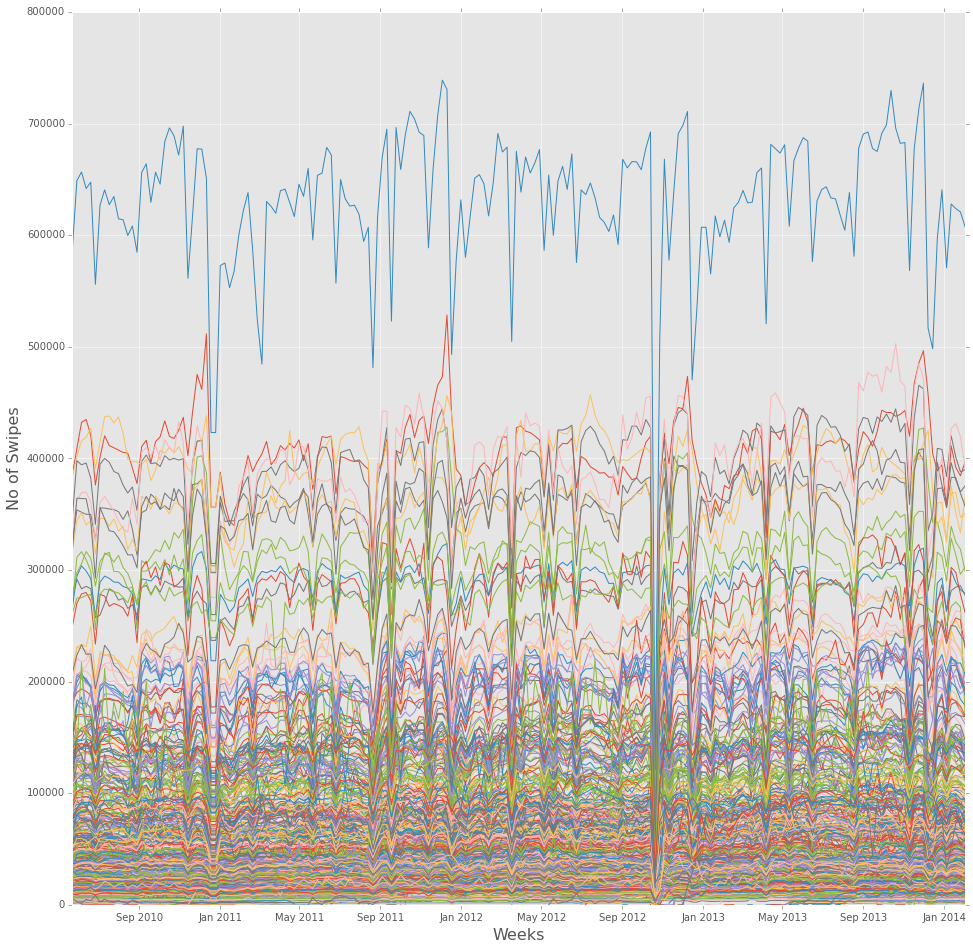

In [27]:
pl.figure(figsize = (16,16))
pl.plot(weeks, np.transpose(stations));
pl.ylabel('No of Swipes', fontsize = 16);
pl.xlabel('Weeks', fontsize = 16);

In [32]:
#Detecting the event by standard deviation and mean
mean = np.nanmean(weekly_swipes)
std = np.nanstd(weekly_swipes)

print np.where(weekly_swipes < (mean - 3*std))


(array([126]),)


### Detected Event
The event occurd 127 weeks after 05/21/2010
This is around the last week of October in 2012, which coincides with when Hurricane Sandy hit NY (October 29th)

# Task 2

29781349.8711 2983960.4217


(array([126]),)

# Task 3